In [232]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

sym.init_printing()

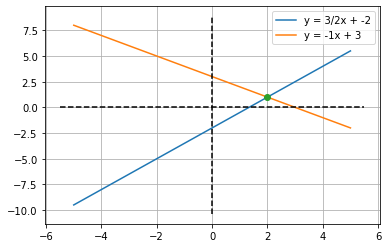

{'solution': [2, 1],
 'lines': [{'m': 3/2,
   'b': -2,
   'x_values': [-5, 5],
   'y_values': array([-19/2, 11/2], dtype=object),
   'x_intercept': [4/3, 0],
   'y_intercept': [0, -2]},
  {'m': -1,
   'b': 3,
   'x_values': [-5, 5],
   'y_values': array([8, -2], dtype=object),
   'x_intercept': [3, 0],
   'y_intercept': [0, 3]}]}

In [242]:
def generate_coord_list(m, x, b):
    y = m * np.array(x) + b
    return y


def convert_standard_eq_to_homo_eq(lines, x_values):
    x, y, b = sym.symbols('x, y, b')
    x1, x2, y1, y2 = sym.symbols('x1, x2, y1, y2')

    graph_data = {
        'solution': [],
        'lines': [],
    }

    for i in range(0, len(lines)):
        line = lines[i]
        standard_equation_formula = line[0] * x + line[1] * y - line[2]
        slope_formula = (y2 - y1) / (x2 - x1)

        x_intercept = sym.solve(sym.solve(standard_equation_formula, y)[0])[0]
        y_intercept = sym.solve(sym.solve(standard_equation_formula, x)[0])[0]

        constant = y_intercept
        x_intercept_coord = [x_intercept, 0]
        y_intercept_coord = [0, constant]
        slope = slope_formula.subs(
            {x1: x_intercept_coord[0], x2: y_intercept_coord[0], y1: x_intercept_coord[1], y2: y_intercept_coord[1]})
        y_values = generate_coord_list(slope, x_values, constant)

        draw_linear_equation(x_values, y_values, slope, constant)

        graph_data['lines'].append({
            'm': slope,
            'b': constant,
            'x_values': x_values,
            'y_values': y_values,
            'x_intercept': x_intercept_coord,
            'y_intercept': y_intercept_coord
        })

    line1 = graph_data['lines'][0]
    line2 = graph_data['lines'][1]

    solution = intersecting_point(line1['m'], line1['b'], line2['m'], line2['b'])
    graph_data['solution'] = solution

    # Style Chart
    plt.grid()
    # plt.axis('square')

    # Draw the x and y axis
    axis = plt.gca()
    plt.plot(axis.get_xlim(), [0, 0], 'k--')
    plt.plot([0, 0], axis.get_ylim(), 'k--')

    plt.legend()
    plt.show()

    return graph_data


convert_standard_eq_to_homo_eq([[3, -2, 4], [1, 1, 3]], [-5, 5])

In [234]:
def intersecting_point(slope1, constant1, slope2, constant2):
    # Step 1: Homogenize both line equations
    l1 = slope_intercept_formula.subs({m: slope1, b: constant1})
    l2 = slope_intercept_formula.subs({m: slope2, b: constant2})

    # Step 2: Solve the 1st equation for x
    x_formula = sym.solve(l1, x)[0]

    # Step 3: Substitute Step 2 equation into the second equation, solving for y
    y_value = sym.solve(l2.subs({x: x_formula}))[0]

    # Step 4: Substitute y value into 1st equation and solve for x
    x_value = sym.solve(l2.subs({x: y_value}))[0]

    # print('Solution = [%s,%s]' % ("{:.1f}".format(x_value), "{:.1f}".format(y_value)))
    plt.plot(x_value, y_value, 'o')
    return [x_value, y_value]
    # return ["{:.1f}".format(x_value), "{:.1f}".format(y_value)]

In [235]:
b, m, x, y = sym.symbols('b, m, x,y')
slope_intercept_formula = m * x - y + b

formulas = {
    "y_intercept_formula": sym.solve(slope_intercept_formula, x)[0],
    "x_intercept_formula": sym.solve(slope_intercept_formula, y)[0],
    "slope_formula": sym.solve(slope_intercept_formula, m)[0],
    'constant_formula': sym.solve(slope_intercept_formula, b)[0]
}

# display(Math('0=%s' % sym.latex(slope_intercept_formula)))
# display(Math('x=%s' % sym.latex(formulas['y_intercept_formula'])))
# display(Math('y=%s' % sym.latex(formulas['x_intercept_formula'])))
# display(Math('m=%s' % sym.latex(formulas['slope_formula'])))
# display(Math('b=%s' % sym.latex(formulas['constant_formula'])))

In [236]:
def draw_linear_equation(x_value_list, y_value_list, slope, constant):
    plt.plot(x_value_list, y_value_list, label='y = %sx + %s' % (slope, constant))


def graph_system_of_equations(lines, x_range):
    graph_data = {
        'solution': [],
        'lines': [],
    }

    for i in range(0, len(lines)):
        slope = lines[i][0]
        constant = lines[i][1]

        # Generate coordinate table and plot the line
        y_range = generate_coord_list(slope, x_range, constant)
        draw_linear_equation(x_range, y_range, slope, constant)

        x_intercept = [sym.solve(formulas['x_intercept_formula'].subs({m: slope, b: constant}))[0], 0]
        y_intercept = [0, sym.solve(formulas['y_intercept_formula'].subs({m: slope, b: constant}))[0]]

        graph_data['lines'].append({
            'm': slope,
            'b': constant,
            'x-intercept': x_intercept,
            'y-intercept': y_intercept,
            'x-coord-range': x_range,
            'y-coord-range': y_range
        })

    # Use sympy to plot the point of intersection
    line1 = graph_data['lines'][0]
    line2 = graph_data['lines'][1]

    solution = intersecting_point(line1['m'], line1['b'], line2['m'], line2['b'])
    graph_data['solution'] = solution

    # Style Chart
    plt.grid()
    # plt.axis('square')

    # Draw the x and y axis
    axis = plt.gca()
    plt.plot(axis.get_xlim(), [0, 0], 'k--')
    plt.plot([0, 0], axis.get_ylim(), 'k--')

    plt.legend()
    plt.show()
    return graph_data

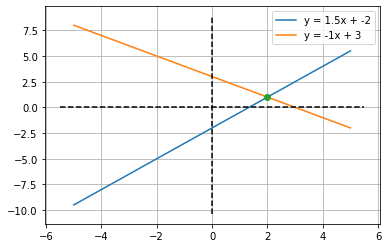

{'solution': [2.00000000000000, 1.00000000000000],
 'lines': [{'m': 1.5,
   'b': -2,
   'x-intercept': [1.33333333333333, 0],
   'y-intercept': [0, -2.00000000000000],
   'x-coord-range': [-5, 5],
   'y-coord-range': array([-9.5,  5.5])},
  {'m': -1,
   'b': 3,
   'x-intercept': [3, 0],
   'y-intercept': [0, 3],
   'x-coord-range': [-5, 5],
   'y-coord-range': array([ 8, -2])}]}

In [237]:
# [[m,b],[m,b]], [-x,+x]
graph_system_of_equations([[3 / 2, -2], [-1, 3]], [-5, 5])
# graph_system_of_equations([[-7/6, 16/3], [-10/13, 15]], [-40, 40])